# <center> ASSESSMENT 1 <center>

## Implement the Naive Bayes and K-Nearest Neighbours algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization.

### STEP 1: Reading the dataset into a DataFrame

In [164]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([train, test]) 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [165]:
# Retrieving the column information
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [166]:
# Retrieving statistics of all columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [167]:
# Retrieving data-types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [168]:
# Information about null values in each column
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### STEP 2: Data Precprocessing

In [169]:
# Handling missing values for Age and Embarked column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [170]:
print(df['Age'].isnull().sum())
print(df['Embarked'].isnull().sum())

0
0


In [171]:
# Label Encoding for Sex column
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 1309, dtype: int64

In [172]:
# Label Encoding for Embarked column
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Text(0.5, 1.0, 'CORRELATION HEATMAP')

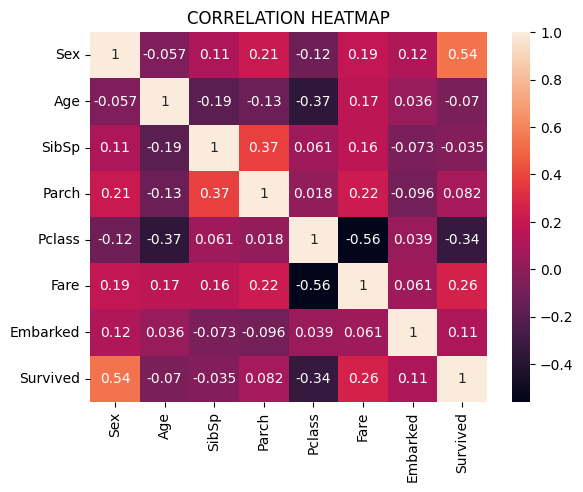

In [173]:
# Feature Selection
# Plotting heatmap to understand correlation
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df[['Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Fare' , 'Embarked','Survived']]

cor = df2.corr()
sns.heatmap(cor, annot=True)
plt.title("CORRELATION HEATMAP")

In [174]:
# The heatmap shows a positive correlation (0.41) between 'SibSp' and 'Parch', indicating they are somewhat redundant.
df['Family'] = df['SibSp'] + df['Parch'] + 1 

In [175]:
# Splitting the dataset again into train and test
train_clean = df[:len(train)]
test_clean = df[len(train):]

In [176]:
# Feature Selection
target = 'Survived'
features = [ 'Sex',  'Fare', 'Embarked', 'SibSp','Age']

x_train = train_clean[features].values
y_train = train_clean[target].values
x_test = test_clean[features].values

### STEP 3: Implementing NaiveBayes Classifier from scratch

In [177]:
# Creating validation split
from sklearn.model_selection import train_test_split

x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)


In [178]:
import numpy as np

def gauss_prob(x, m, v):
    eps = 1e-6  # Avoid division by zero
    coeff = 1 / np.sqrt(2 * np.pi * v + eps)
    exp = np.exp(-((x - m) ** 2) / (2 * v + eps))
    return coeff * exp

class NB:
    def fit(self, X, y):
        self.cls = np.unique(y) # Find all unique classes
        self.means = {}
        self.vars = {}
        self.priors = {}

        for c in self.cls:
            Xc = X[y == c]
            self.means[c] = np.mean(Xc, axis=0)  # Mean per feature per class
            self.vars[c] = np.var(Xc, axis=0)   # Variance per feature per class
            self.priors[c] = len(Xc) / len(X)   # Prior prob of class

    def predict(self, X):
        preds = []
        for i in range(len(X)):
            post = []
            for c in self.cls:
                prior = np.log(self.priors[c])
                like = np.sum(np.log(gauss_prob(X[i], self.means[c], self.vars[c])))
                post.append(prior + like)
            preds.append(self.cls[np.argmax(post)])  # Class with highest posterior
        return np.array(preds)

## Implementing KNN Classifier

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_test):
        preds = []
        for x in X_test:
            dists = [] # Calculate distance from test_point to all training points
            for x_train in self.X:
                d = np.linalg.norm(x - x_train)
                dists.append(d)
            dists = np.array(dists) # Get indices of k smallest distances
            idx = dists.argsort()[:self.k]
            k_labels = self.y[idx] # Get corresponding labels
            label = Counter(k_labels).most_common(1)[0][0] # Get most common label
            preds.append(label)
        return np.array(preds)

# To find best value of k
accuracies = []
for k in range(1, 21):
    knn = KNN(k=k)
    knn.fit(x_train, y_train)
    preds = knn.predict(x_val)
    acc = np.mean(preds == y_val)
    accuracies.append((k, acc))

for k, acc in accuracies:
    print(f"k = {k}: Accuracy = {acc:.3f}")

### STEP 4: Training and Prediction

In [ ]:
# Naive Bayes
m1 = NB()
m1.fit(x_train, y_train)
y_pred_val = m1.predict(x_val)
y_pred_test = m1.predict(x_test)

In [ ]:
# KNN
# Taking k =4 as k=1 or 2 might lead to overfitting
m2 = KNN(k=4)
m2.fit(x_train, y_train) 
y_pred1_val = m2.predict(x_val)  
y_pred1_test = m2.predict(x_test)

In [ ]:
# Displaying predicted output 
print(y_pred_test.astype(int)) # Naive Bayes
print(y_pred1_test.astype(int))# KNN

### STEP 5: Performance Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Naive Bayes
print("Naive Bayes Validation Performance:\n")
print("Accuracy:", accuracy_score(y_val, y_pred_val), "\n")
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

In [ ]:


# KNN
print("KNN Validation Performance:\n")
print("Accuracy:", accuracy_score(y_val, y_pred1_val), "\n")
print(classification_report(y_val, y_pred1_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred1_val))

## Conclusion

### After performing thorough data preprocessing — including handling missing values, encoding categorical variables, and applying feature selection techniques such as dropping irrelevant columns and engineering new features, the accuracy of both the models are:
### 1) NaiveBayes - 0.79
### 2) KNN - 0.90